## Group Members:

Tej Gottapu (tg672@drexel.edu)


## Project Type:  

*   **Data Mining and Report**


## Application Domain: 

*   **Medicine.**




## Project Background:

* **Breast cancer is an uncontrolled growth of breast cells.A tumor is considered as 'malignant' if the cells can grow into surrounding tissues or spread to distant areas of the body. A benign tumor does not invade nearby tissue nor spread to other parts of the body the way cancerous tumors can. But benign tumors can be serious if they press the vital parts and very rarely transform into malignant tumors. Breast cancer is the most frequent cancer among women, impacting 2.1 million women each year, and also causes the greatest number of cancer-related deaths among women.In 2018, it is estimated that 627,000 women died from breast cancer that is approximately 15% of all cancer deaths among women.** 

* **While breast cancer rates are higher among women in more developed regions, rates are increasing in nearly every region globally. In order to improve breast cancer outcomes and survival, early detection is critical.Early diagnosis strategies focus on providing timely access to cancer treatment by reducing barriers to care and/or improving access to effective diagnosis services. The goal is to increase the proportion of breast cancers identified at an early stage, allowing for more effective treatment to be used and reducing the risks of death from breast cancer. Machine Learning techniques can enhance the intensity of diagnosis in breast cancer. According to various researches, the professional physicians can detect cancer by 79% accuracy while a 91%(sometimes up to 97%) accuracy can be achieved by machine learning techniques.**




Reference : https://www.who.int/cancer/prevention/diagnosis-screening/breast-cancer/en/

## Problem and Objectives

* **Our problem is to identify whether the patient breast tumor is benign or malignant.**
* **We can identity breast cancer stage based upon the information about the patient cell nucleus.**
* **If we are able to diagnose the cancer stage it will help us in decreasing the cancer mortality rate.**
* **Our objective is to able to identify the stage of the cancer based on the patient cell nucleus information.**


## Dataset:
* **https://www.kaggle.com/uciml/breast-cancer-wisconsin-data**
* **Our dataset contains features which are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. which helps in the diagnosis .**


## Process involved in achieving our goal from the above dataset:

1) **Data Cleaning**

* Detecting and correcting inaccurate and corrupt records.

2) **Data visualization**

* Visualizing the data to understand trends, outliners and patterns in attributes data.

3) **Feature selection** 

* Selecting the features which contribute the most to our output in which we are interested, so that we can avoid the impact of irrelevant features.

4) **Classification**

* Using different classification models(Linear, Non-Linear, Naive Bayes, Decision tree etc.)to predict the interested variable.


## Methodology 

* In order to achieve our goal we are going to follow below method: 

* Initially we are going to clean the dataset and visualize the data to perform feature selection and we are going to perform the classification using feature selection.

* In our project we are going to use correlation analysis and tree based feature selection techniques to obtain the best features which are used with our classification models.

* Since our dataset is numerical and predicted variable is categorical we are going to perform the classification by using linear(perceptron) ,non-linear(Decision Tree/K-neighbor),tree model by considering different parameters.

* We are going to take accuracy and F1-score as performance measure because we cant completely rely on accuracy alone as a performance measure due to the chance of over-fitting the dataset so F1-score (Harmonic mean of precision and recall)acts as an better performance measure for our classification model.


In [1]:
## Imports all necessary modules
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import linalg
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import PredefinedHoldoutSplit
from mlxtend.frequent_patterns import apriori, association_rules
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML, display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score



In [2]:
#Reading the datafile 
data = pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning

* **We have checked for Null values and found that the column "Unnamed: 32" has 569 NaN values hence we are dropping the entire column.**

* **Dropping columns "id" and "diagnosis" which are unrelated for our classification.**

 

In [3]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
data = data.drop(columns = ['Unnamed: 32'])

In [5]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**We can also see that id, diagnosis doesn't play any role in the class prediction so these two can be dropped.**


In [7]:
y = data.diagnosis

In [8]:
y.describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [9]:
lst = ['id','diagnosis']
data_new = data.drop(columns = lst)


In [10]:
data_new .head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Describing our data

In [12]:
data_new .describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Identifying whether predicting variable is balanced in the dataset or not.**

Number of Benign:  357
Number of Malignant :  212


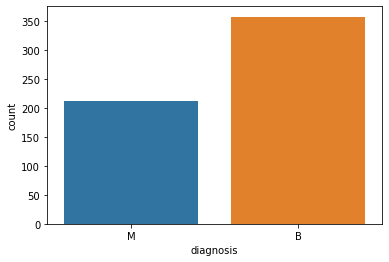

In [13]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

* **Our class is not  balanced as 37% is related to class "M"(Malignant) and 63% is related to class "B"(Benign).**
* **So chances of diagnosing the stage as class "B"(Benign) is more and we should make sure that this doesn't cause big problem.** 


## Data visualization

 *   **Visualizing the dataset attributes to evaluate trends, outliners and pattern for information gain.**

 *   **Here we are going to use two visualization techniques: heatmap and box plot.**

### Visualization using box plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

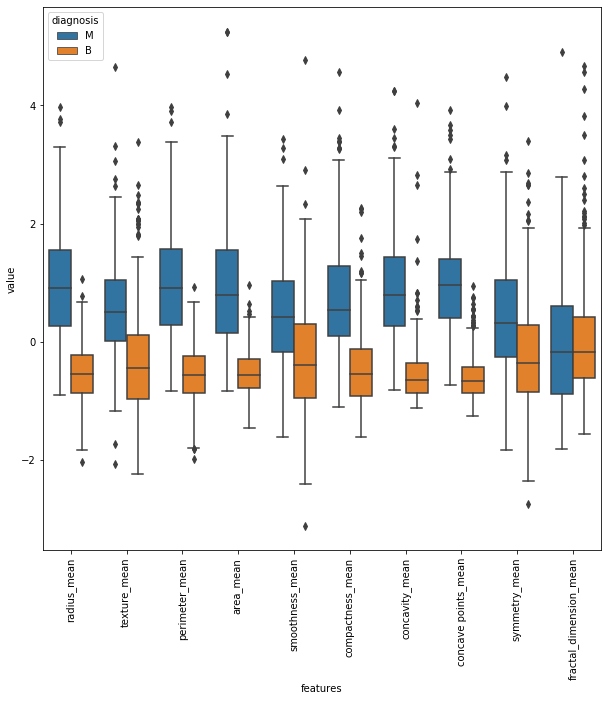

In [14]:
#box plot for first 10 colums
data_dia = y
data = data_new 
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

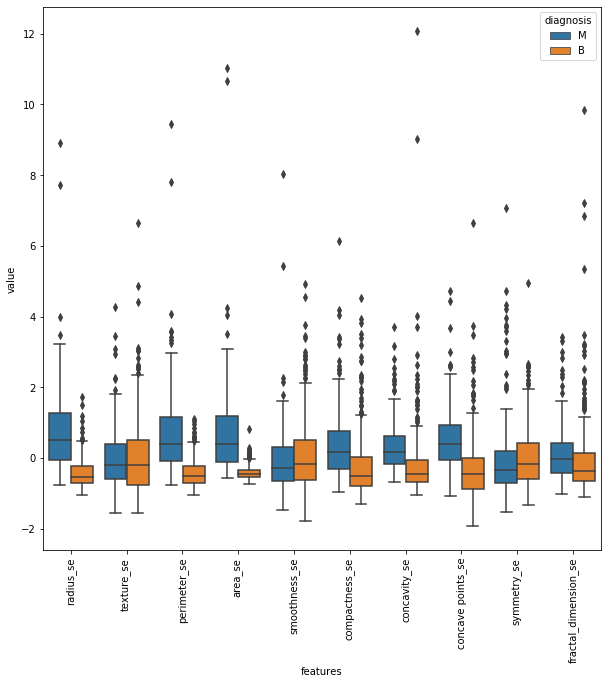

In [15]:
#box plot for second 10 colums
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

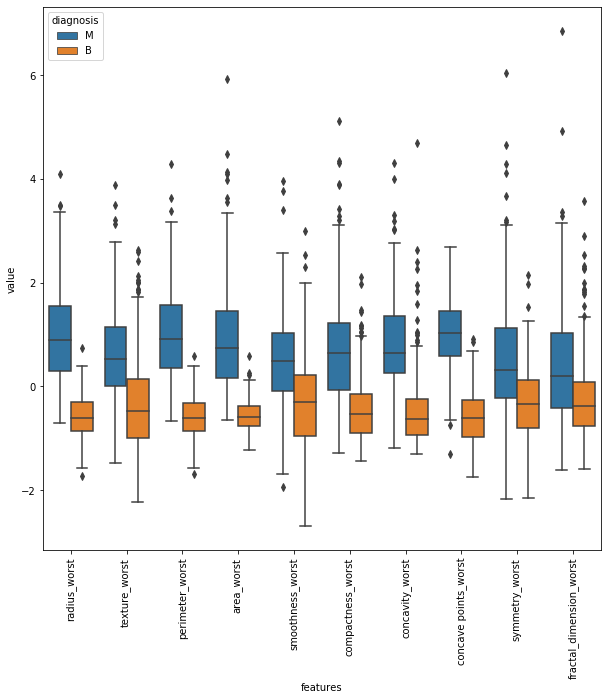

In [16]:
#box plot for last 12 colums
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

* **When we look at the above plots we can see that every attribute has their outliners and most of the attributes have the box plots which look similar but we can't say that they are correlated with each other or not.**
* **In order to get the deeper sense we are using heatmap visualization technique to see to what extent the attributes are correlated.**

### Visualization using heatmap

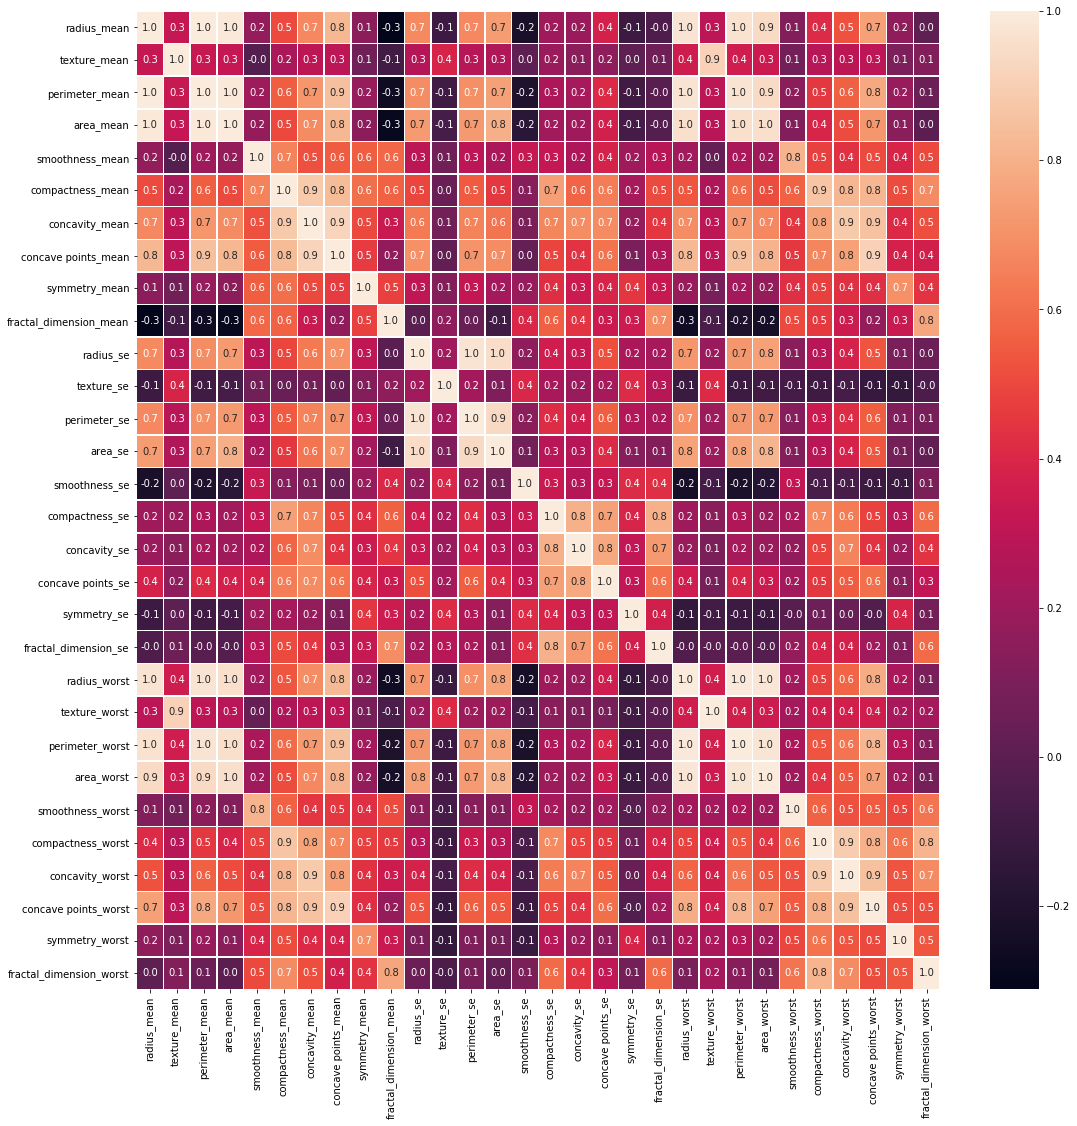

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**When we look at the heatmap of the attributes, we can see that there are attributes in the dataset which are correlated and can be replaced with one and another.** 

## Feature selection

* **Feature selection helps us in removing irrelevant features that impact our prediction variable.**
* **There are several feature selection techniques like correlation analysis,univariate feature selection,tree based feature selection,recursive feature elimination etc. which helps us to find the best features which plays a vital role in predicting the class.**

* **In our dataset we have 29 attributes, among these are some irrelevant features which need to be handled and we are going to do this by using following process:
    At first we are going to perform correlation analysis to remove the similar features and later using tree based feature selection on these to get best features so that we will be able to predict the class with information of minimum attributes**.




## Feature selection with correlation analysis



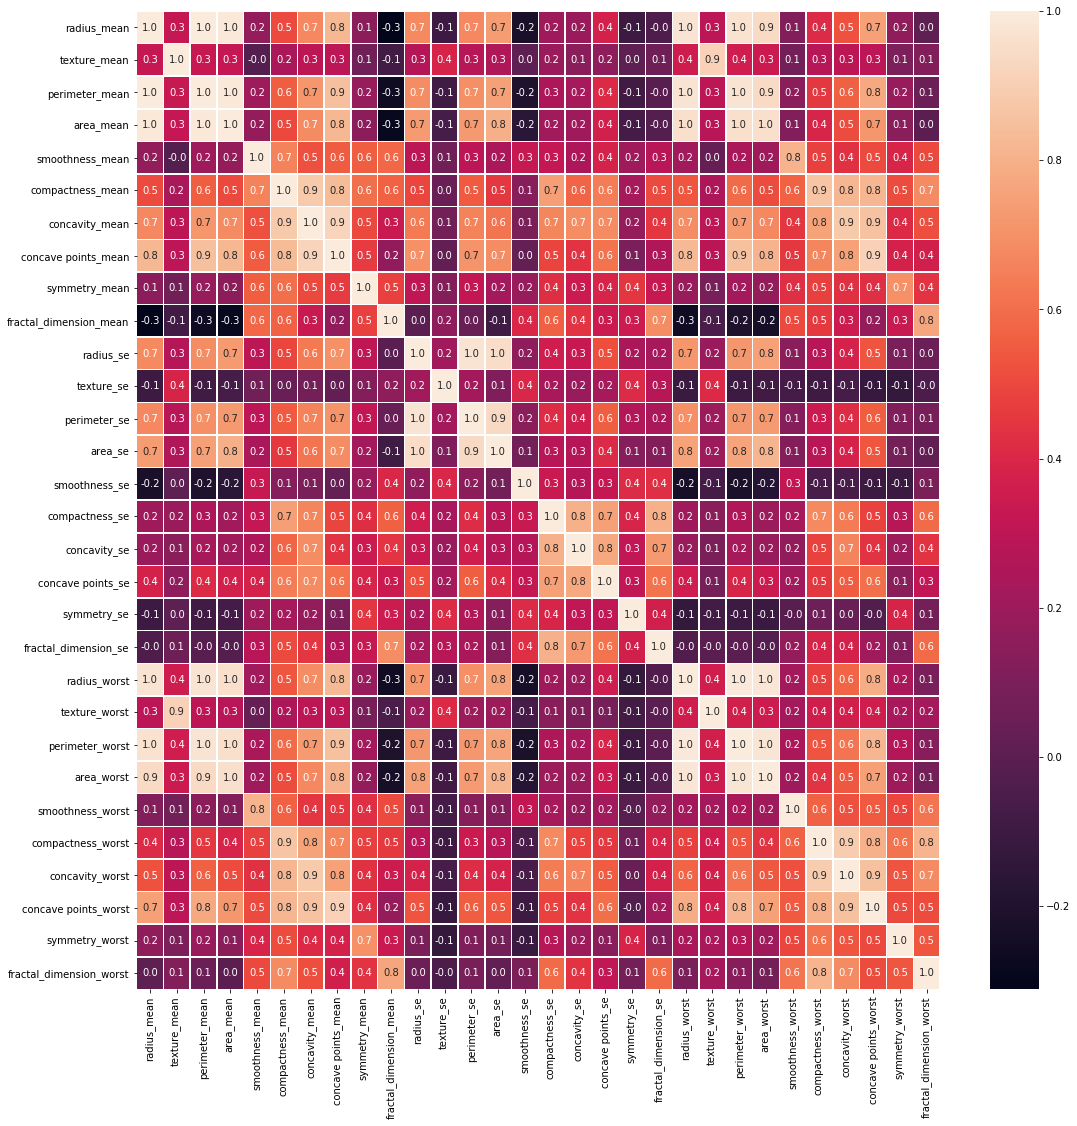

In [18]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Based on the heatmap we are able to conclude correlated attributes .We are picking one of the correlated attributes and mentioning them below .**

**Note:** There is no logical explanation for why we have chosen the particular attributes by ignoring other variables.
*    (radius_mean, perimeter_mean and area_mean )are correlated and we are going to use “area_mean”.

 

*  (Compactness_mean, concavity_mean and concave points_mean) are correlated and we are going to use “concavity_mean”.

 

*    (radius_se, perimeter_se and area_se) are correlated and we are going to use “area_se”.

 

*    (radius_worst, perimeter_worst and area_worst) are correlated and we are going to use “area_worst”.

 


*    (Compactness_worst, concavity_worst and concave points_worst) are correlated and we are going to use “concavity_worst”.

 

*    (Compactness_se, concavity_se and concave points_se) are correlated and we are going to use “concavity_se”.

 

*    (texture_mean and texture_worst) are correlated and we are going to use “texture_mean”.

 

*    (area_worst and area_mean) are correlated and we are going to use “area_mean”.

In [19]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
Updated_data = data_new.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
Updated_data.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [20]:
Updated_data.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,654.889104,0.096360,0.088799,0.181162,0.062798,1.216853,40.337079,0.007041,0.031894,0.020542,0.003795,0.132369,0.272188,0.290076,0.083946
std,4.301036,351.914129,0.014064,0.079720,0.027414,0.007060,0.551648,45.491006,0.003003,0.030186,0.008266,0.002646,0.022832,0.208624,0.061867,0.018061
min,9.710000,143.500000,0.052630,0.000000,0.106000,0.049960,0.360200,6.802000,0.001713,0.000000,0.007882,0.000895,0.071170,0.000000,0.156500,0.055040
25%,16.170000,420.300000,0.086370,0.029560,0.161900,0.057700,0.833900,17.850000,0.005169,0.015090,0.015160,0.002248,0.116600,0.114500,0.250400,0.071460
50%,18.840000,551.100000,0.095870,0.061540,0.179200,0.061540,1.108000,24.530000,0.006380,0.025890,0.018730,0.003187,0.131300,0.226700,0.282200,0.080040
75%,21.800000,782.700000,0.105300,0.130700,0.195700,0.066120,1.474000,45.190000,0.008146,0.042050,0.023480,0.004558,0.146000,0.382900,0.317900,0.092080
max,39.280000,2501.000000,0.163400,0.426800,0.304000,0.097440,4.885000,542.200000,0.031130,0.396000,0.078950,0.029840,0.222600,1.252000,0.663800,0.207500


### Tree based feature selection

**In order to get the best features, we are going to use the tree based feature selection from the features that are selected using correlation analysis.**


Feature ranking:
1. feature 3 (0.231628)
2. feature 1 (0.188224)
3. feature 7 (0.155246)
4. feature 13 (0.145172)
5. feature 14 (0.055327)
6. feature 0 (0.047048)
7. feature 2 (0.025562)
8. feature 12 (0.023983)
9. feature 5 (0.023340)
10. feature 9 (0.023079)
11. feature 15 (0.020310)
12. feature 10 (0.014357)
13. feature 11 (0.014269)
14. feature 8 (0.013523)
15. feature 6 (0.009719)
16. feature 4 (0.009212)


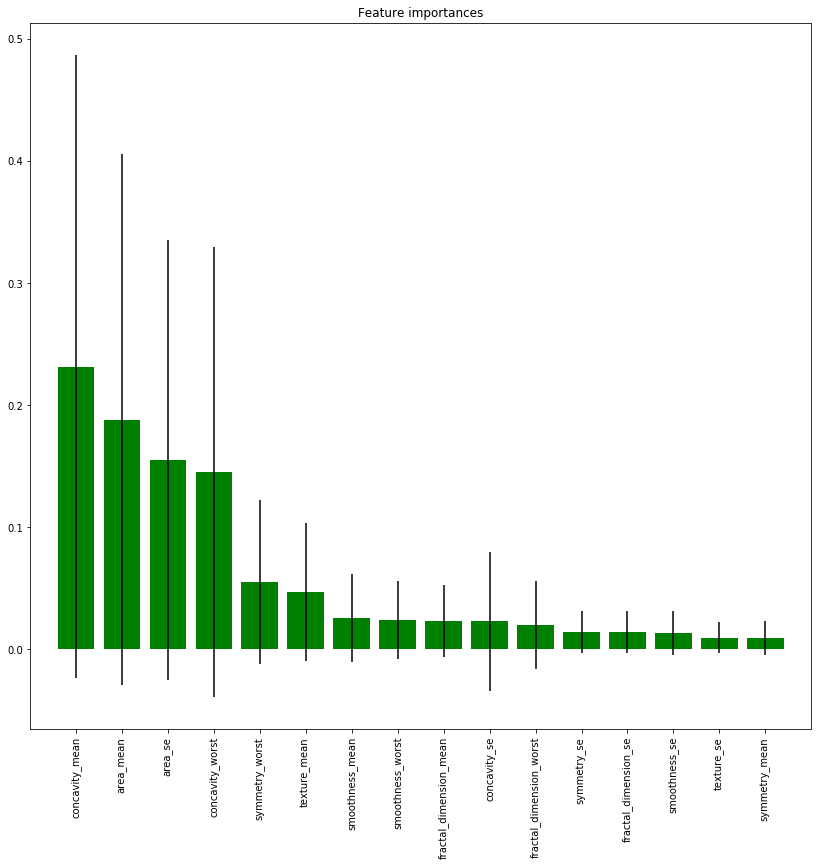

In [21]:

x_train, x_test, y_train, y_test = train_test_split(Updated_data, y, test_size=0.3, random_state=42)
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

**As you can seen in plot above, there are 5 best important features. Therefore let's focus on these 5 features and use them in our classification and see the results. Here we are using Random forest classification.**

In [22]:
Updated_data.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [23]:
drop_list = ['smoothness_se','texture_se','symmetry_mean','symmetry_se','fractal_dimension_se','fractal_dimension_worst','fractal_dimension_mean','smoothness_mean','texture_mean','smoothness_worst','symmetry_worst','perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
Updated_data1 = data_new.drop(drop_list,axis = 1 )   # do not modify x, we will use it later
Updated_data1.head()

,area_mean,concavity_mean,area_se,concavity_se,concavity_worst
0,1001.0,0.3001,153.40,0.05373,0.7119
1,1326.0,0.0869,74.08,0.01860,0.2416
2,1203.0,0.1974,94.03,0.03832,0.4504
3,386.1,0.2414,27.23,0.05661,0.6869
4,1297.0,0.1980,94.44,0.05688,0.4000


* **Now we have selected features which are obtained using correlation analysis and tree based feature selection.**
* **We are going to use these features in our classification models and analyze the classification reports.**

## Classification




**Correlation analysis feature selection with Perceptron(Linear model) classification.**

In [24]:
from sklearn.linear_model import Perceptron

# build a perceptron (single layer neural network)
# with parameters: 
# 1. 20 iterations
# 2. learning rate of 0.15
x_train, x_test, y_train, y_test = train_test_split(Updated_data, y, test_size=0.3, random_state=42)
net1 = Perceptron(max_iter=200, eta0=2, random_state=0)
net1.fit(x_train, y_train)
stage_p = net1.predict(x_test)

w0 = net1.intercept_[0]

w1, w2 = net1.coef_[0][0],net1.coef_[0][1]
print("The linear model is: {:.2f}{:+.2f}b{:+.2f}m = 0".format(w0, w1, w2))

The linear model is: -1876.00-23448.12b+78.60m = 0


Accuracy is:  0.7777777777777778
              precision    recall  f1-score   support

           B       0.93      0.70      0.80       108
           M       0.64      0.90      0.75        63

    accuracy                           0.78       171
   macro avg       0.78      0.80      0.78       171
weighted avg       0.82      0.78      0.78       171



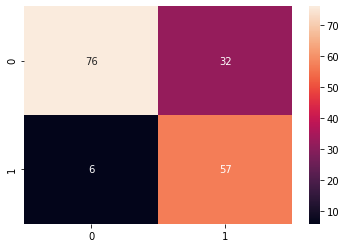

In [25]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#confusion_matrix(stage_p, y_test)
#display(plot_confusion_matrix(net1, X_test, test.Sentiment, values_format='d'))
ac = accuracy_score(y_test,net1.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,net1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,net1.predict(x_test))
print(clf)

**Correlation analysis and tree based  feature selection with Perceptron(Linear model) classification.**

In [26]:
from sklearn.linear_model import Perceptron

# build a perceptron (single layer neural network)
# with parameters: 
# 1. 20 iterations
# 2. learning rate of 0.15
x_train, x_test, y_train, y_test = train_test_split(Updated_data1, y, test_size=0.3, random_state=42)
net1 = Perceptron(max_iter=200, eta0=2, random_state=0)
net1.fit(x_train, y_train)
stage_p = net1.predict(x_test)

w0 = net1.intercept_[0]

w1, w2 = net1.coef_[0][0],net1.coef_[0][1]
print("The linear model is: {:.2f}{:+.2f}b{:+.2f}m = 0".format(w0, w1, w2))

The linear model is: -1638.00+112.40b+83.78m = 0


Accuracy is:  0.3684210526315789
              precision    recall  f1-score   support

           B       0.00      0.00      0.00       108
           M       0.37      1.00      0.54        63

    accuracy                           0.37       171
   macro avg       0.18      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



C:\Users\shyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


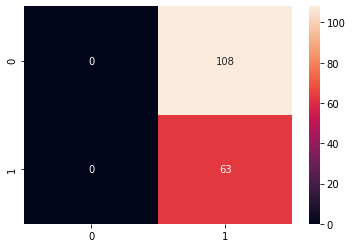

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#confusion_matrix(stage_p, y_test)
#display(plot_confusion_matrix(net1, X_test, test.Sentiment, values_format='d'))
ac = accuracy_score(y_test,net1.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,net1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,net1.predict(x_test))
print(clf)

**Correlation analysis feature selection with LinearSVC(Linear model) classification.**

In [28]:
from sklearn.svm import LinearSVC

# with parameters: 
# 1. 20 iterations
# 2. learning rate of 0.15
x_train, x_test, y_train, y_test = train_test_split(Updated_data, y, test_size=0.3, random_state=42)
net1 = LinearSVC(max_iter=50,penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0)
net1.fit(x_train, y_train)
stage_p = net1.predict(x_test)

w0 = net1.intercept_[0]

w1, w2 = net1.coef_[0][0],net1.coef_[0][1]
print("The linear model is: {:.2f}{:+.2f}b{:+.2f}m = 0".format(w0, w1, w2))

The linear model is: -0.01-0.07b-0.00m = 0


C:\Users\shyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy is:  0.7017543859649122
              precision    recall  f1-score   support

           B       0.68      1.00      0.81       108
           M       1.00      0.19      0.32        63

    accuracy                           0.70       171
   macro avg       0.84      0.60      0.56       171
weighted avg       0.80      0.70      0.63       171



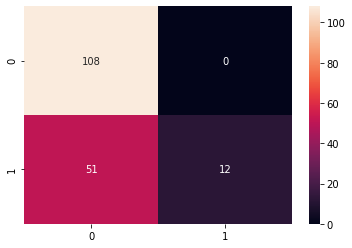

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#confusion_matrix(stage_p, y_test)
#display(plot_confusion_matrix(net1, X_test, test.Sentiment, values_format='d'))
ac = accuracy_score(y_test,net1.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,net1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,net1.predict(x_test))
print(clf)

**Correlation analysis and tree based  feature selection with LinearSVC(Linear model) classification.**

In [30]:
from sklearn.svm import LinearSVC

# with parameters: 
# 1. 20 iterations
# 2. learning rate of 0.15
x_train, x_test, y_train, y_test = train_test_split(Updated_data1, y, test_size=0.3, random_state=42)
net1 = LinearSVC(max_iter=50,penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=0)
net1.fit(x_train, y_train)
stage_p = net1.predict(x_test)

w0 = net1.intercept_[0]

w1, w2 = net1.coef_[0][0],net1.coef_[0][1]
print("The linear model is: {:.2f}{:+.2f}b{:+.2f}m = 0".format(w0, w1, w2))

The linear model is: -0.02-0.00b+0.00m = 0


C:\Users\shyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy is:  0.631578947368421
              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



C:\Users\shyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


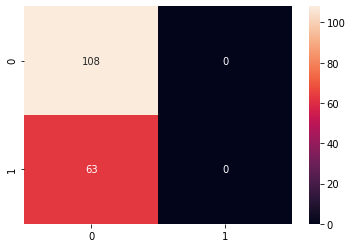

In [31]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#confusion_matrix(stage_p, y_test)
#display(plot_confusion_matrix(net1, X_test, test.Sentiment, values_format='d'))
ac = accuracy_score(y_test,net1.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,net1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,net1.predict(x_test))
print(clf)


**Correlation analysis feature selection with RandomForestClassifier(Non-Linear model) classification.**

Accuracy is:  0.9707602339181286
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



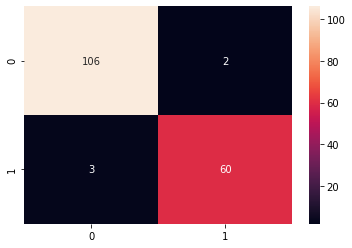

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(Updated_data, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=100 (default)
clf_rf = RandomForestClassifier(random_state=0,bootstrap=True)  
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,clf_rf.predict(x_test))
print(clf)

**Correlation analysis and tree based  feature selection with RandomForestClassifier(Non-Linear model) classification.**

Accuracy is:  0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



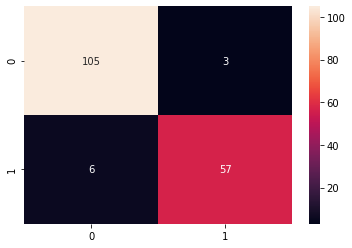

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(Updated_data1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=100 (default)
clf_rf = RandomForestClassifier(random_state=0,bootstrap=True)  
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,clf_rf.predict(x_test))
print(clf)

**Correlation analysis feature selection with MLPClassifier(Non-Linear model) classification.**

Accuracy is:  0.9649122807017544
              precision    recall  f1-score   support

           B       0.99      0.95      0.97       108
           M       0.93      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



C:\Users\shyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


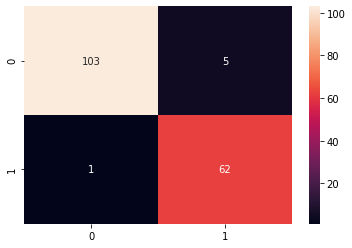

In [34]:
from sklearn.neural_network import MLPClassifier
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(Updated_data, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=100 (default)
clf_rf = MLPClassifier(hidden_layer_sizes=(20), activation='logistic', 
                     solver='lbfgs', max_iter=100,random_state=0) 
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,clf_rf.predict(x_test))
print(clf)

**Correlation analysis and tree based  feature selection with MLPClassifier(Non-Linear model) classification.**

Accuracy is:  0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.96      0.96       108
           M       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



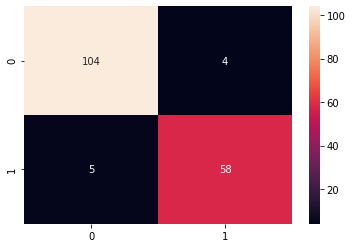

In [35]:
from sklearn.neural_network import MLPClassifier
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(Updated_data1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=100 (default)
clf_rf = MLPClassifier(hidden_layer_sizes=(20), activation='logistic', 
                     solver='lbfgs', max_iter=100,random_state=0) 
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
from sklearn.metrics import classification_report
clf= classification_report(y_test,clf_rf.predict(x_test))
print(clf)

**Comparing results of different feature selection techniques with different models.**

| Feature selection technique with Model                       | Accuracy   |  F1-score(weighted avg)    |    |
|------------------------------|-------------|------------|--------------------------------------|
| **correlation analysis feature selection with Perceptron (Linear model) classification.** |  0.77     |   0.78  |        
| **correlation analysis and tree based feature selection with Perceptron (Linear model) classification.** |  0.37    |   0.20   |      
| **correlation analysis feature selection with LinearSVC (Linear model) classification.** |  0.70   |   0.63   |                                 |
|**correlation analysis and tree based feature selection with LinearSVC (Linear model) classification.** |  0.63     |   0.49   |                                |
| **correlation analysis feature selection with Random Forest Classifier (Non-Linear model) classification.**| 0.97 | 0.97|            |
| **correlation analysis and tree based feature selection with Random Forest Classifier (Non-Linear model) classification.**| 0.94|  0.95                
| **correlation analysis feature selection with MLPClassifier (Non-Linear model) classification.**|0.96|0.97|  |
| **correlation analysis and tree based feature selection with MLPClassifier (Non-Linear model) classification.**|0.94|0.95  | |


## Efforts and Insights


*  **In our project, our major goal is to identify state of breast tumor given the patient cell nucleus information, our dataset is pretty much cleaned with less corrupted data so we didn’t face much problem in data cleaning. But when we visualized the class distribution, we found there is class imbalance in the dataset which is biased towards a particular class. We can handle this problem using different regression techniques and add the dummy tuples so that the class is balanced but we didn’t follow this for our dataset as our data is sensitive and related to the medical field and so we ignored it and proceeded to the next steps.**



* **We visualized the attributes of the dataset using box plots and heatmap to evaluate the patterns and gain the information about the attributes. From the box plots we observed that some attributes are having similar plots, so we used heatmap to see the correlation of the attributes. We can say that there are outliners in the attributes by looking at the box plot, but we didn't handle them as our data is sensitive and there are chances that they may not be outliners and hence we proceeded with our next steps.**



* **We can see that our dataset has total of 29 attributes which contributes to the prediction of the interested variable, but we can't say that every attribute plays the exact same role in the prediction. There might be irrelevant attributes which can be negatively impacting the prediction. So we are taking care of those features using feature selection techniques .Here we used correlation analysis to eliminate the similar attributes and later applied decision tree technique to get the best features which contribute much to the class prediction. By doing this we are able to get two sets of attributes one containing 16 sets of features and other containing 5 sets of features from 29 features of the dataset. We used these selected features for our classification models.**


* **In our project we are going to predict the categorical data with one category being class "M"(Malignant) and other being class "B"(Benign). As we are predicting categorical data, we used models like Perceptron(Linear model), LinearSVC(Linear model), RandomForestClassifier(Non-Linear model) and MLPClassifier(Non-Linear model) with the selected features.**



* **Correlation analysis feature selection with Perceptron(Linear model) classification**

    * While performing the above classification we used features selected using correlation analysis with Perceptron (Linear model) which is a single layer network and the model was able to get an accuracy and F1 score of 77% . The model was not able to perform the classification accurately because weighted sums of the features selected are biased so the model didn't perform well.
    
        **Note:** Default classifier parameters are used except for max_itr to get optimal model.



* **Correlation analysis and tree based feature selection with Perceptron(Linear model) classification**

     * While performing the above classification we used features selected using correlation analysis and tree based feature selection with Perceptron (Linear model) which is a single layer network and the model was able to get an accuracy of 37% and F1 score of 20% . The model was not able to perform the classification accurately because weighted sums of the selected features are biased and also these features didn't have much information about the contribution in  prediction of the class. Thus the model didn't perform well.
   
       **Note:** Default classifier parameters are used except for max_itr to get optimal model.     
     

* **Correlation analysis feature selection with LinearSVC(Linear model) classification**

    * While performing the above classification we used features selected using correlation analysis with LinearSVC (Linear model) which divides the classes based on the support vector mechanism and the model was able to get an accuracy of 70 % and F1 score of 63%. The model was not able to get good results as the support vectors which define the class separation are closely related, that made the class separation to be difficult, so the model didn't perform well.
    
        **Note:** Default classifier parameters are used except for max_itr to get optimal model.
    
    
    
* **Correlation analysis and tree based feature selection with LinearSVC(Linear model) classification**

    * While performing the above classification we used features selected using correlation analysis and tree based feature selection with LinearSVC (Linear model) which divides the classes based on the support vector mechanism and the model was able to get an accuracy of 63 % and F1 score of 49%. The model was not able to get good results as the support vectors which define the class separation are closely related that makes the class separation to be difficult and also there are less selected features which doesn't have much information which helps in the prediction of the class, so the model didn't perform well.
    
        **Note:** Default classifier parameters are used except for max_itr to get optimal model.
    
    
    
* **Correlation analysis feature selection with RandomForestClassifier(Non-Linear model) classification**

    * While performing the above classification we used features selected using correlation analysis with Random Forest Classifier (Non-Linear model) by keeping the parameter default, we know that random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.We also know that sub-sample parameter is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.In our project we are not going to control size of the decision trees by using the parameters as our dataset is not that big to prune trees.We also have random state fixed so that deterministic behavior is obtained during fitting.By following above we are able to get accuracy and F1 score of 97%.We might have a doubt on better accuracy might be due to over-fitting but decision tree classifiers fits on various sub-samples of the dataset and uses averaging to improve the accuracy by controlling the over-fitting but still we can't rely on this entirely if the dataset is not balanced.
    

    
    
    
* **Correlation analysis and tree based feature selection with RandomForestClassifier(Non-Linear model) classification**

    * While performing the above classification we used features selected using correlation analysis and tree based feature selection with Random Forest Classifier (Non-Linear model) by keeping the parameter default ,we know that random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We also know that subsample parameter is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree. In our project we are not going to control size of the decision trees by using the parameters as our dataset is not that big to prune trees. We also have random state fixed so that deterministic behavior is obtained during fitting.By following above we are able to get accuracy of 94% and F1 score of 95%. We might have a doubt on better accuracy might be due to over-fitting but decision tree classifiers fits on various sub-samples of the dataset and uses averaging to improve the accuracy by controlling the over-fitting but still we can't rely on this entirely if the dataset is not balanced. Yet it didn't out run the correlation analysis feature selection with RandomForest Classifier(Non-Linear model) classification model because selected features have less information for the class prediction. But it was able to get good results with even 5 sets of attributes.
    


* **Correlation analysis feature selection with MLPClassifier (Non-Linear model) classification**

    * While performing the above classification we used features selected using correlation analysis with MLPClassifier (Non-Linear model) by keeping the parameters default. As we know that MLPclassifier is a multi-layer network model which trains iteratively as each time-step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters and prevent the over-fitting by adding the regularization term to the loss function. MLPClassifier uses back propagation technique. This method helps in gaining more information in class prediction so multilayer neural networks give the best performances. By following this we are able to get accuracy of 96% and F1 score of 97%.
   
         **Note:** Default classifier parameters are used except for hidden layers=(20) to get optimal model.  
    
    
* **Correlation analysis and tree based feature selection with MLPClassifier (Non-Linear model) classification**
    
    * While performing the above classification we used features selected using correlation analysis and tree based feature selection with MLPClassifier with MLPClassifier (Non-Linear model) by keeping the parameters default. As we know that MLPclassifier is a multi-layer network model which trains iteratively as each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters and prevent the over-fitting by adding the regularization term to the loss function. MLPClassifier uses back propagation technique. This method helps in gaining more information in class prediction so multilayer neural networks give the best performances. By following this, we are able to get accuracy of 94% and F1 score of 95%. Yet it didn't out run the correlation analysis feature selection with MLPClassifier (Non-Linear model) classification model because the selected features have less information for the class prediction. But it was able to get good results with even 5 set of attributes.

        **Note:** Default classifier parameters are used except for hidden layers=(20) to get optimal model.
        
        
* **Performance measure**
    
    * We are going to take accuracy and F1-score as performance measures as we cant completely rely on accuracy alone as a performance measure bacause of the chance of over-fitting the dataset. Since our dataset is not balanced so F1-score (Harmonic mean of precision and recall)acts as a better performance measure for our classification model than accuracy .



## Conclusion 


* **From the above analysis when we compare different classification model results, we can see which model provides us the desired result.**

* **correlation analysis feature selection with RandomForestClassifier(Non-Linear model) classification model gave us the good result by using 16 out of 32 attributes from the data.**

* **For the above discussed models, we performed classifications using feature selection techniques so that we can gain more information with less attributes.**

* **By following the feature selection technique we are able to reduce the features to a minimum of 5 attributes with almost 95% of accuracy.**




## Other aspects specific to this project

* **The size of training datasets need to be adequate while using the classification models for predicting a disease. A large dataset can be used to split the data sufficiently into training and test datasets to enhance generalizability of the model.**


* **The dataset quality and the feature selection methods are important for effective cancer prediction models.Selecting an informative feature for training a model by choosing an appropriate feature selection methods result in better models. It is required for a Machine Learning technique to be regulated with different feature sets while handling the clinical variables.**


* **The selection of the most appropriate model depends on various parameters such as types of data collected, the size of the data samples, the time limitations as well as the type of prediction outcomes. So far we have build the models based on the given data, in addition to this we have done some research in various medical sites and found that there are other factors to be considered such as Personal history, Genetic factors, age, Family history of breast cancer for causing breast cancer.**


* **The models which we have build can be used by potential researchers and students in the fields of bio-technology and medicine for their research. In addition to this, people who are working in World Health Organisation(WHO), Centers for Disease Control and Prevention(CDC), etc can also employee this for their research.**

